In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import json
from datetime import datetime

# Load and analyze function
def load_and_analyze_spotify_history(file_path):
    # Read JSON file
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
    
    # Convert to DataFrame
    df = pd.DataFrame(data)
    
    # Convert endTime to datetime
    df['endTime'] = pd.to_datetime(df['endTime'])
    
    # Convert msPlayed to minutes
    df['minutesPlayed'] = df['msPlayed'] / (1000 * 60)
    return df

In [2]:

# Load the data
df = load_and_analyze_spotify_history('StreamingHistory_music_0.json')


In [3]:
# Calculate artist statistics
artist_stats = df.groupby('artistName').agg({
    'minutesPlayed': 'sum',
    'trackName': 'count'
}).round(2)


artist_stats.columns = ['Total Minutes Played', 'Number of Plays']
artist_stats = artist_stats.sort_values('Total Minutes Played', ascending=False)

In [4]:
# Calculate track statistics
track_stats = df.groupby(['artistName', 'trackName']).agg({
    'minutesPlayed': 'sum',
    'trackName': 'count'
}).round(2)

track_stats.columns = ['Total Minutes Played', 'Number of Plays']
track_stats = track_stats.sort_values('Total Minutes Played', ascending=False)


In [5]:

# Calculate summary statistics
summary = {
    'Total Unique Artists': len(df['artistName'].unique()),
    'Total Unique Tracks': len(df['trackName'].unique()),
    'Total Minutes Played': df['minutesPlayed'].sum().round(2),
    'Total Hours Played': (df['minutesPlayed'].sum() / 60).round(2),
    'Most Played Artist': artist_stats.index[0],
    'Most Played Track': f"{track_stats.index[0][1]} by {track_stats.index[0][0]}",
    'Average Session Length (minutes)': df['minutesPlayed'].mean().round(2),
    'Date Range': f"{df['endTime'].min().date()} to {df['endTime'].max().date()}"
}


# Print summary statistics
print("\nSpotify Listening History Analysis")
print("=" * 40)
print("\nSummary Statistics:")
for key, value in summary.items():
    print(f"{key}: {value}")


Spotify Listening History Analysis

Summary Statistics:
Total Unique Artists: 310
Total Unique Tracks: 711
Total Minutes Played: 22321.5
Total Hours Played: 372.03
Most Played Artist: Anirudh Ravichander
Most Played Track: Sajde by Shankar-Ehsaan-Loy
Average Session Length (minutes): 3.36
Date Range: 2023-02-20 to 2024-10-25


In [6]:

# Print top artists
print("\nTop 10 Most Played Artists:")
print("=" * 40)
print(artist_stats.head(10))


Top 10 Most Played Artists:
                     Total Minutes Played  Number of Plays
artistName                                                
Anirudh Ravichander               1624.30              603
Pritam                            1045.35              270
KK                                 715.31              162
Karthik                            694.19              155
Shreya Ghoshal                     693.29              172
Vishal-Shekhar                     691.30              142
Shankar-Ehsaan-Loy                 660.89              147
Jatin-Lalit                        627.74              141
Mani Sharma                        605.63              144
Aashir Wajahat                     586.15              236


In [7]:

# Print top tracks
print("\nTop 10 Most Played Tracks:")
print("=" * 40)
print(track_stats.head(10))


Top 10 Most Played Tracks:
                                    Total Minutes Played  Number of Plays
artistName         trackName                                             
Shankar-Ehsaan-Loy Sajde                          657.82              142
Jatin-Lalit        Mere Haath Mein                627.21              139
Vishal-Shekhar     Hey Shona                      593.03              116
Aashir Wajahat     Sadqay                         582.55              235
Jigar Saraiya      Diamond Ni                     560.07              192
Gajendra Verma     Mann Mera                      493.81              153
Maanu              Jhol                           488.06              118
Karthik            Naa Manasuki                   466.02               87
Haricharan         O Baby O Baby                  426.97               97
Atif Aslam         Tere Liye                      380.28               88


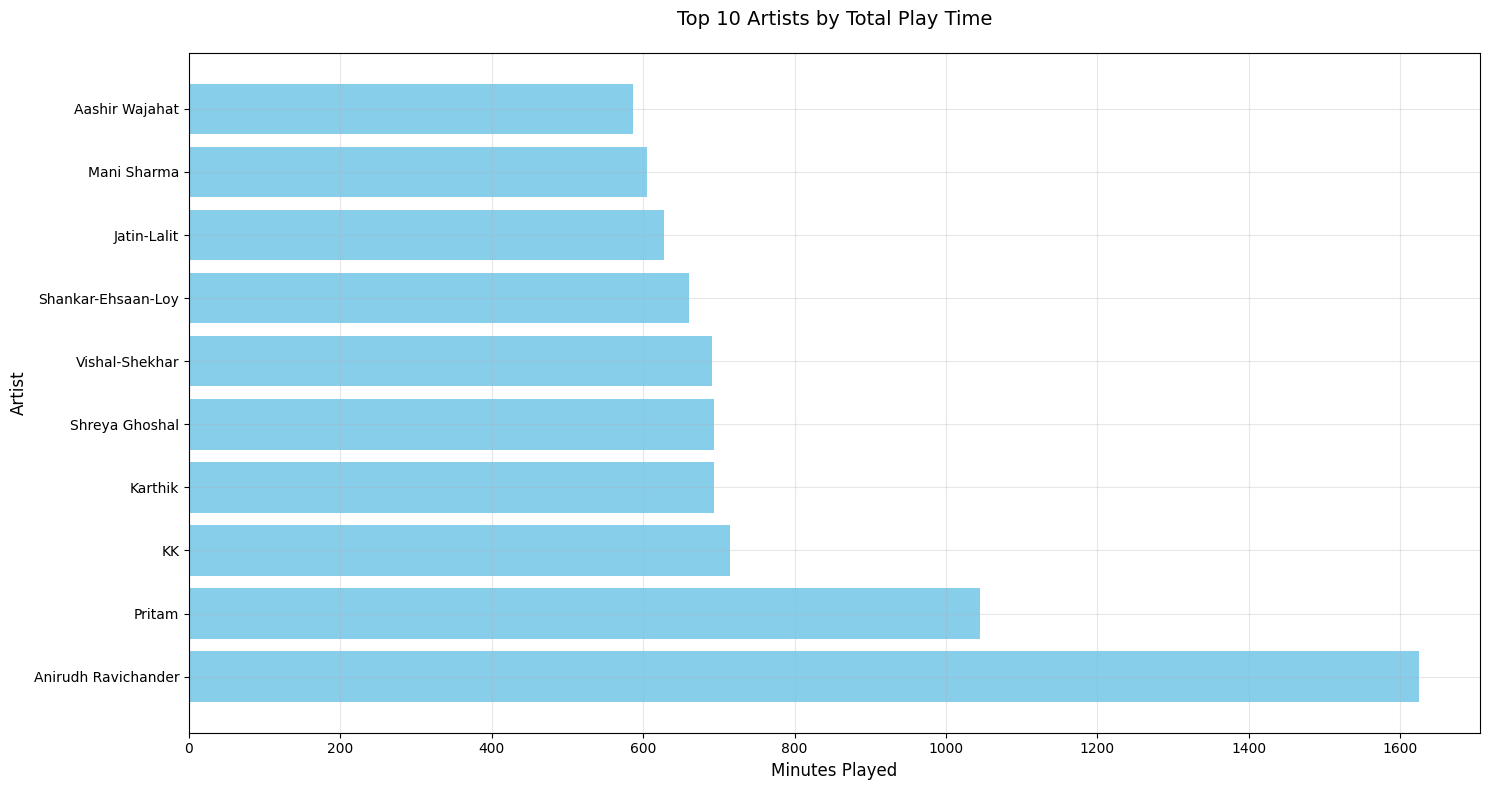

In [8]:
# Visualization 1: Top Artists
plt.figure(figsize=(15, 8))
top_10_artists = artist_stats.head(10)
plt.barh(top_10_artists.index, top_10_artists['Total Minutes Played'], color='skyblue')
plt.title('Top 10 Artists by Total Play Time', fontsize=14, pad=20)
plt.xlabel('Minutes Played', fontsize=12)
plt.ylabel('Artist', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

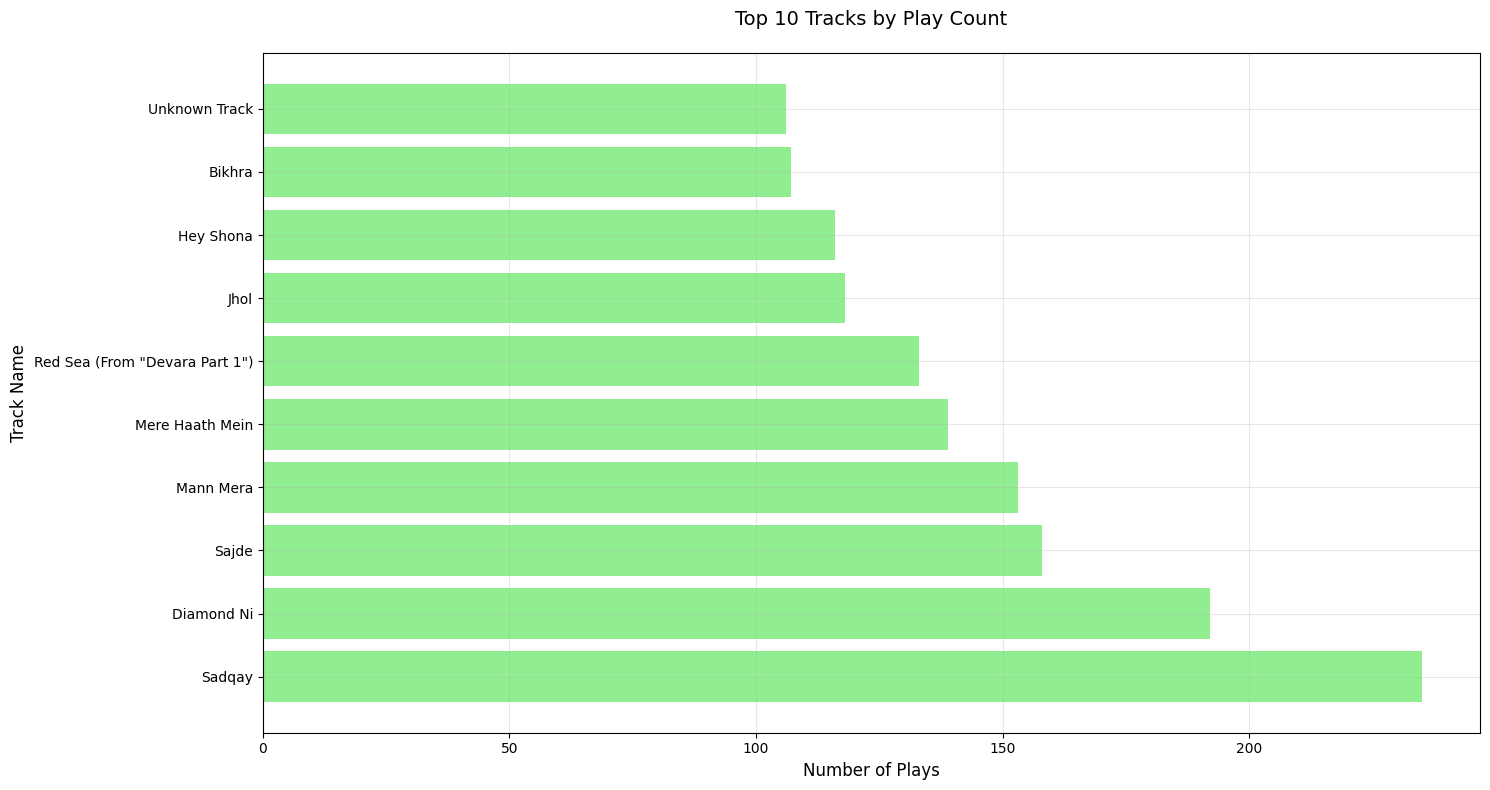

In [9]:
# Visualization 2: Top Tracks
plt.figure(figsize=(15, 8))
track_plays = df['trackName'].value_counts().head(10)
plt.barh(track_plays.index, track_plays.values, color='lightgreen')
plt.title('Top 10 Tracks by Play Count', fontsize=14, pad=20)
plt.xlabel('Number of Plays', fontsize=12)
plt.ylabel('Track Name', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

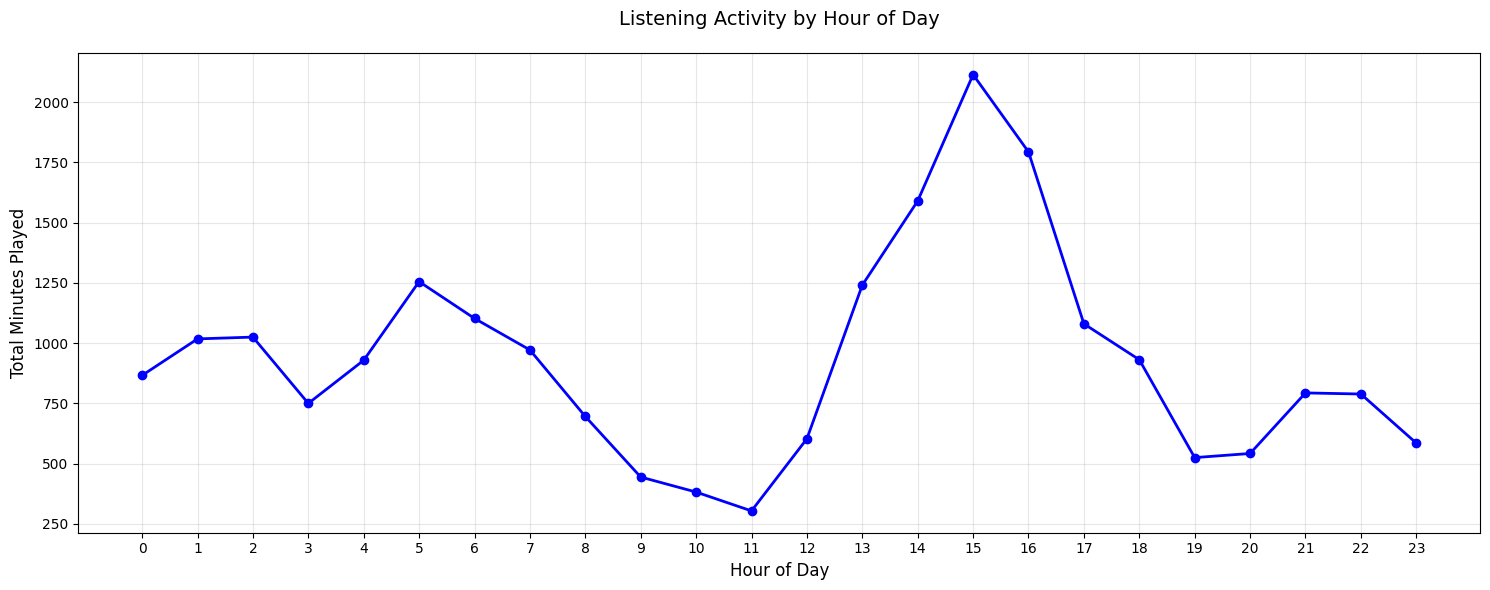

In [10]:
# Visualization 3: Hourly Listening Pattern
plt.figure(figsize=(15, 6))
df['hour'] = df['endTime'].dt.hour
hourly_listening = df.groupby('hour')['minutesPlayed'].sum()
plt.plot(hourly_listening.index, hourly_listening.values, marker='o', color='blue', linewidth=2)
plt.title('Listening Activity by Hour of Day', fontsize=14, pad=20)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Total Minutes Played', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

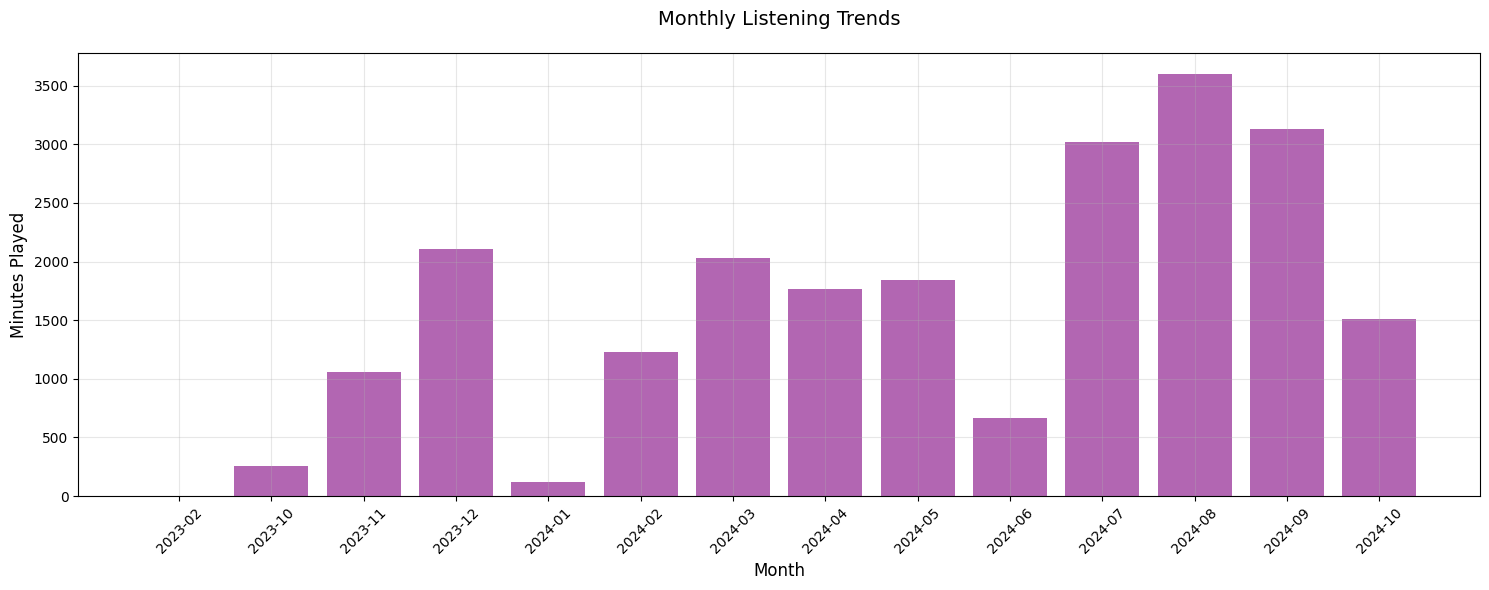

In [11]:
# Visualization 4: Monthly Trends
plt.figure(figsize=(15, 6))
df['month_year'] = df['endTime'].dt.to_period('M')
monthly_stats = df.groupby('month_year')['minutesPlayed'].sum().reset_index()
monthly_stats['month_year'] = monthly_stats['month_year'].astype(str)
plt.bar(monthly_stats['month_year'], monthly_stats['minutesPlayed'], color='purple', alpha=0.6)
plt.title('Monthly Listening Trends', fontsize=14, pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Minutes Played', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

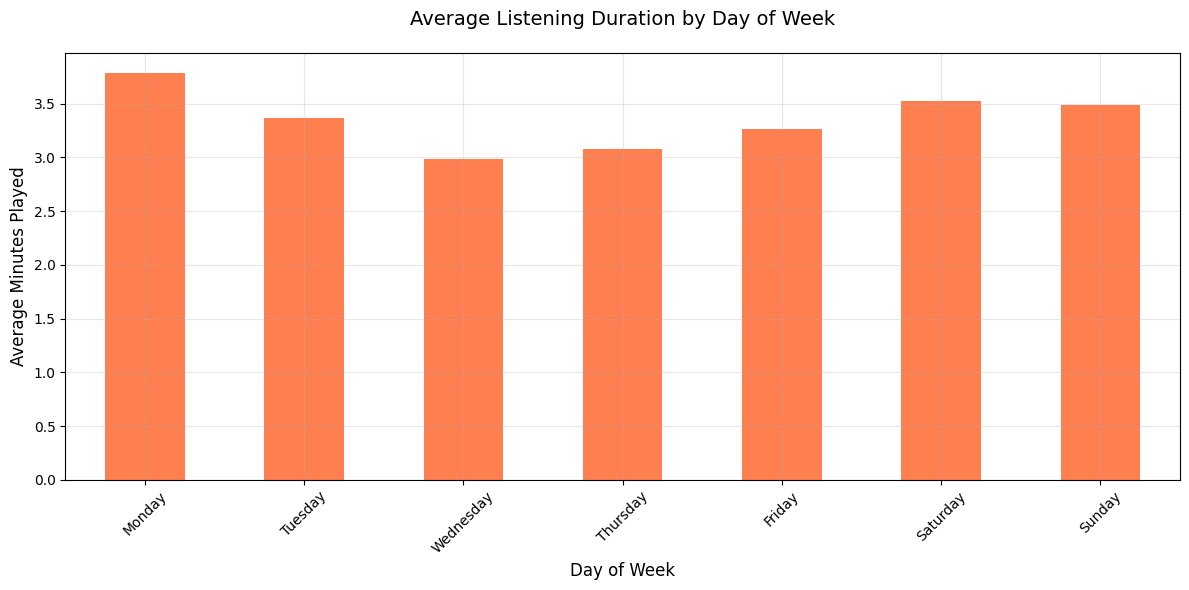

In [12]:

# Additional Analysis: Average listening duration by day of week
df['day_of_week'] = df['endTime'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_avg = df.groupby('day_of_week')['minutesPlayed'].mean().reindex(day_order)

plt.figure(figsize=(12, 6))
daily_avg.plot(kind='bar', color='coral')
plt.title('Average Listening Duration by Day of Week', fontsize=14, pad=20)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Average Minutes Played', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [13]:

# Top Artists Table with More Details
detailed_artist_stats = df.groupby('artistName').agg({
    'minutesPlayed': ['sum', 'mean', 'count'],
    'trackName': pd.Series.nunique
}).round(2)

detailed_artist_stats.columns = ['Total Minutes', 'Avg Minutes per Play', 'Number of Plays', 'Unique Tracks']
detailed_artist_stats = detailed_artist_stats.sort_values('Total Minutes', ascending=False)

print("\nDetailed Artist Statistics (Top 10):")
print("=" * 40)
print(detailed_artist_stats.head(10))


Detailed Artist Statistics (Top 10):
                     Total Minutes  Avg Minutes per Play  Number of Plays  \
artistName                                                                  
Anirudh Ravichander        1624.30                  2.69              603   
Pritam                     1045.35                  3.87              270   
KK                          715.31                  4.42              162   
Karthik                     694.19                  4.48              155   
Shreya Ghoshal              693.29                  4.03              172   
Vishal-Shekhar              691.30                  4.87              142   
Shankar-Ehsaan-Loy          660.89                  4.50              147   
Jatin-Lalit                 627.74                  4.45              141   
Mani Sharma                 605.63                  4.21              144   
Aashir Wajahat              586.15                  2.48              236   

                     Unique Tracks  
